In [1]:
!rm -r orl_faces
!rm -r att_faces.tar.Z
!wget http://www.cl.cam.ac.uk/Research/DTG/attarchive/pub/data/att_faces.tar.Z
!tar -xzvf att_faces.tar.Z
!rm att_faces.tar.Z

--2018-06-16 20:41:51--  http://www.cl.cam.ac.uk/Research/DTG/attarchive/pub/data/att_faces.tar.Z
Resolving www.cl.cam.ac.uk (www.cl.cam.ac.uk)... 128.232.0.20, 2001:630:212:200::80:14
Connecting to www.cl.cam.ac.uk (www.cl.cam.ac.uk)|128.232.0.20|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://www.cl.cam.ac.uk/research/dtg/attarchive/pub/data/att_faces.tar.Z [following]
--2018-06-16 20:41:51--  http://www.cl.cam.ac.uk/research/dtg/attarchive/pub/data/att_faces.tar.Z
Reusing existing connection to www.cl.cam.ac.uk:80.
HTTP request sent, awaiting response... 200 OK
Length: 4075767 (3.9M) [application/x-compress]
Saving to: ‘att_faces.tar.Z’

att_faces.tar.Z     100%[===================>]   3.89M   487KB/s    in 8.6s    

2018-06-16 20:42:00 (462 KB/s) - ‘att_faces.tar.Z’ saved [4075767/4075767]

orl_faces/
orl_faces/README
orl_faces/s1/
orl_faces/s1/6.pgm
orl_faces/s1/7.pgm
orl_faces/s1/8.pgm
orl_faces/s1/9.pgm
orl_faces/s1/10.pgm
orl_fac

orl_faces/s39/8.pgm
orl_faces/s39/9.pgm
orl_faces/s39/10.pgm
orl_faces/s39/1.pgm
orl_faces/s39/2.pgm
orl_faces/s39/3.pgm
orl_faces/s39/4.pgm
orl_faces/s39/5.pgm
orl_faces/s40/
orl_faces/s40/6.pgm
orl_faces/s40/7.pgm
orl_faces/s40/8.pgm
orl_faces/s40/9.pgm
orl_faces/s40/10.pgm
orl_faces/s40/1.pgm
orl_faces/s40/2.pgm
orl_faces/s40/3.pgm
orl_faces/s40/4.pgm
orl_faces/s40/5.pgm


In [89]:
% reset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os
from PIL import Image


%matplotlib inline
%load_ext autoreload
%autoreload 2


def walk_dir(root_str, action_at_leaf, action_at_parent):

    directory = os.fsencode(root_str)
    for file in os.listdir(directory):
        filename = os.fsdecode(file)
        file_path = os.path.join(root_str, filename)
        if os.path.isdir(os.fsencode(file_path)):
            action_at_parent(file_path)
            walk_dir(file_path,action_at_leaf, action_at_parent)
        elif os.path.isfile(file_path):
            action_at_leaf(file_path)
            

def load_img_into(X):
    def load_img(path):
        try:
            img = Image.open(path)
            X.append(np.array(img))
        except:
            pass
        
    return load_img

def set_label_into(y):
    def set_label(path):
        y.extend([int(os.path.basename(path).replace('s',''))]*10)
    return set_label

def load_faces(root_path):
    X = []
    y = []
    walk_dir(root_path, load_img_into(X), set_label_into(y))
    y = np.array(y)
    X = np.array(X).reshape(400,-1)
    return X, y


root = 'orl_faces'
X, y = load_faces(root)
X_train = X[0:400:2,:]
X_test = X[1:400:2,:]
y_train = y[0:400:2]
y_test = y[1:400:2]

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
--2018-03-11 19:28:03--  http://www.cl.cam.ac.uk/Research/DTG/attarchive/pub/data/att_faces.tar.Z
Resolving www.cl.cam.ac.uk (www.cl.cam.ac.uk)... 128.232.0.20, 2001:630:212:200::80:14
Connecting to www.cl.cam.ac.uk (www.cl.cam.ac.uk)|128.232.0.20|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://www.cl.cam.ac.uk/research/dtg/attarchive/pub/data/att_faces.tar.Z [following]
--2018-03-11 19:28:04--  http://www.cl.cam.ac.uk/research/dtg/attarchive/pub/data/att_faces.tar.Z
Reusing existing connection to www.cl.cam.ac.uk:80.
HTTP request sent, awaiting response... 200 OK
Length: 4075767 (3.9M) [application/x-compress]
Saving to: ‘att_faces.tar.Z’

att_faces.tar.Z     100%[===================>]   3.89M   841KB/s    in 5.3s    

2018-03-11 19:28:09 (751 KB/s) - ‘att_faces.tar.Z’ saved [4075767/407

In [90]:
class DecisionTree:
    def __init__(self, eta=1, pi=1):
        self.eta = eta
        self.pi = pi
        self.root = None
        self.num_classes = 0
        self.scorers = {'entropy':self._entropy_scorer()}



    
    class _entropy_scorer:
        def __init__(self):
            self.max = 1.
            self.min = 0.

        def score(self, priors, yes_probs, no_probs, sz, yes_sz, no_sz):

            def H(probs):
                
                entropy = 0
                for p in probs:
                    if p != 0:
                        entropy -= p*np.log2(p)
                return entropy
            
            return H(priors) - (yes_sz/sz)*H(yes_probs) - (no_sz/sz)*H(no_probs)



    def _remaining_indices(self,X, idx_vec):
        return np.setdiff1d(range(X.shape[0]), idx_vec)
        
    def _split(self, X, y, splitter): 

        yes_idx = splitter(X)
        no_idx = self._remaining_indices(X, yes_idx)

        X_yes =  X[yes_idx,:]
        y_yes = y[yes_idx]
        X_no = X[no_idx,:]
        y_no = y[no_idx]
        return X_yes, y_yes, X_no, y_no

    
    def _eval_numeric_attr(self, X, y, attr, scorer):

            
        # sort rows of X and y based on the attribute being evaluated
        sorted_idx = np.argsort(X[:,attr])
        xj = X[sorted_idx,attr]
        yj = y[sorted_idx]
        sz = xj.shape[0]
        
        cls_szs = np.array([xj[yj == c].shape[0] for  c in range(self.num_classes)])
        mid_points = []
        for i in range(sz):
            if i != sz-1 and xj[i] != xj[i+1]:
                mid_points.append((xj[i] + xj[i+1])/2)

        mid_points = np.asarray(mid_points)
        n_mp = mid_points.shape[0]
        
        Nvi = np.empty((n_mp,self.num_classes)) # number of elements havinf xj <= the corresponding 
                                                # midpoint and belonging to class ci
        
        for i in range(n_mp):
            for c in range(self.num_classes):
                Nvi[i,c] = np.where(np.logical_and(yj==c, xj<=mid_points[i]))[0].shape[0]

        priors = cls_szs/sz # class priors given the current partition

        best_score, best_v = 0, 0
        
        total_yes_sz = np.sum(Nvi, axis=1) # total number of points in Dy for each split v
        
        total_no_sz = np.sum(cls_szs - Nvi, axis=1) # total number of points in Dn for each split


        for i, v in enumerate(mid_points):  
            
            yes_probs = Nvi[i]/total_yes_sz[i]
            no_probs = (cls_szs - Nvi[i])/total_no_sz[i]

        
            score = scorer.score(priors, yes_probs, no_probs, sz, total_yes_sz[i], total_no_sz[i])

            if score > best_score:
                best_score = score
                best_v = v
            if best_score == scorer.max:
                # prune the search if we achieve the best possible score
                break
        
        return best_v, best_score





    def _eval_categorical_attr(self, X, y, attr, max_subset, scorer):


        if attr not in self.categorical_attrs:
            raise ValueError()
        
        eps = 1e-10
        dom = self.categorical_attrs[attr] # domain of the current categorical attribute
        dom_sz = dom.shape[0]
        sz = X.shape[0]
        xj = X[:,attr]
        cls_szs = np.array([xj[y == c].shape[0] for  c in range(self.num_classes)])
        priors = cls_szs/(sz+eps) # class priors given the current partition
        Nvi = np.empty((dom_sz, self.num_classes)) 
        

        for i in range(dom_sz):
            for c in range(self.num_classes):
                Nvi[i,c] = np.where(np.logical_and(y == c, xj == dom[i]))[0].shape[0]

        subsets = [] # a set of all subset indices of size <= max_subset
        for set_sz in range(1,max_subset+1):
            for subset in list(it.combinations(range(dom_sz),set_sz)):
                subsets.append(np.asarray(subset))
        

        prune_search = False
        best_score, best_v = 0, 0
        for v in subsets:
            if prune_search:
                break

            yes_probs, no_probs = np.empty(self.num_classes), np.empty(self.num_classes) 
            # size of the yes/no partitions for the current subset split
            yes_subset_sz = np.sum(Nvi[v,:])
            no_subset_sz =  sz - yes_subset_sz
            
            for c in range(self.num_classes):
                # number of elements belonging to both current subset and current classs
                subset_sz = np.sum(Nvi[v,c])
                yes_probs[c] = subset_sz/(yes_subset_sz + eps)
                no_probs[c] = (cls_szs[c] - subset_sz)/(no_subset_sz + eps)
                
            score = scorer.score(priors, yes_probs, no_probs, sz, yes_subset_sz, no_subset_sz)
            
            if score > best_score:
                best_score = score
                best_v = v

            if best_score == scorer.max:
                # prune the search if we achieve the best possible score
                prune_search = True
                break
        
        return best_v, best_score

    

    def _build_tree(self, X, y,scorer, max_subset):
        
        sz,D = X.shape # partition size
        cls_szs = np.array([X[y == c].shape[0] for  c in range(self.num_classes)]) # size of each class
        purity = np.max(cls_szs/sz)

        def leaf(): # refactored to a closure as it is used twice
            maj_cls = np.argmax(cls_szs/sz)
            return Node(label=maj_cls)

        pres_cls = [c for c in range(self.num_classes)  if cls_szs[c] != 0 ]
        

        if sz <= self.eta or purity >= self.pi:
            return leaf()

        best_split, best_score, best_v, best_attr = None, -1, 0.0, 0
        for attr in range(D):
            if attr not in self.categorical_attrs:
                v, score = self._eval_numeric_attr(X, y, attr, scorer)
                if score >= best_score:
                    best_score = score
                    # nested lambda to capture the state of the loop counter into the lambda scope
                    best_split = (lambda i,val: lambda x: np.where(x[:,i] <= val)[0])(attr,v)
                    best_v = v
                    best_attr = attr
            else:
                v, score = self._eval_categorical_attr(X, y, attr, max_subset, scorer)
                if score >= best_score:
                    best_score = score
                    best_split = (lambda i,val: lambda x: np.where(np.in1d(x[:,i],val))[0])(attr,v)
                    best_v = v
                    best_attr = attr
        


        if best_score == scorer.min:
            # if we couldn't achieve any improvement on current score return a leaf to avoid infinite recursion
            return leaf()

        X_yes, y_yes, X_no, y_no = self._split(X, y, best_split) # split the data based on the best splitter obtained
        
        # recurse to build the yes and no subtrees
        yes_tree = self._build_tree(X_yes, y_yes, scorer,max_subset)
        no_tree = self._build_tree(X_no, y_no, scorer,max_subset)
        return Node(split_criterion=best_split, left=yes_tree, right=no_tree)





    def train(self, X, y, C,scorer_name='entropy', categorical_attrs={}, max_subset=2 ):
        '''
            categorical_attrs: a map of categorical atribute indices to their domains
            if value for domain is None unique values in the column are used
            C: number of classes
        '''
        self.num_classes = C
        self.categorical_attrs = categorical_attrs
        
        # if the domain of the categorica attribute is not given set it to the unique values in the column
        for k, v in categorical_attrs.items():
            if v is None:
                categorical_attrs[k] = np.unique(X[:,k])

        self.root = self._build_tree(X, y, self.scorers[scorer_name], max_subset)

    


    def _find_labels(self, X, curr_node, curr_idx_vec):
        '''
            Returns a matrix with N(total number of examples) rows and two columns where column one contains 
            the index of the example and column two contains the predicted class.
            ---------
            Parameters
            ----------
            curr_idx_vec: the indices of the rows that have reached this point in the tree relative to the
            original matrix rows.
            X: The original matrix being with N rows
        '''
        sz = curr_idx_vec.shape[0]
        x_curr = X[curr_idx_vec,:]
       
    
        if sz == 0: # if no rows reachd this point in the tree return an empty array 
            return np.empty((0,2))
        
        
        if curr_node.is_leaf():
            # return a 2d array with column 1 as the index of the label and column 2 as the label of the current leaf
            labels = [curr_node.label]*sz
            return np.asarray(list(zip(curr_idx_vec, labels)))


        yes_idx_vec = curr_node.split_criterion(x_curr)
        no_idx_vec = self._remaining_indices(x_curr, yes_idx_vec)

        
        yes_labels = self._find_labels(X, curr_node.left, curr_idx_vec=curr_idx_vec[yes_idx_vec])
        no_labels = self._find_labels(X, curr_node.right, curr_idx_vec=curr_idx_vec[no_idx_vec])


        return np.concatenate((yes_labels, no_labels), axis=0)
                            


    def predict(self, X,verbose=False):
        idx_label_pair = self._find_labels(X, self.root, np.arange(X.shape[0]))
        sorted_idx = np.argsort(idx_label_pair[:,0])
        return idx_label_pair[sorted_idx,1]

class Node:
    def __init__(self, label=None, split_criterion=None, left=None, right=None):
        self.left = left
        self.right = right
        self.label = label
        self.split_criterion = split_criterion
        if (split_criterion is not None and label is not None):
            raise ValueError()
        elif split_criterion is not None:
            self.type = 'internal'
        elif label is not None:
            self.type = 'leaf'
    def is_leaf(self):
        return self.type == 'leaf'
    def is_internal(self):
        return self.type == 'internal'



In [91]:
def pca_then_tree(pca_comps):
    DT = DecisionTree()
    accs = []
    for comps in pca_comps:
        pca = PCA(n_components=comps)
        DT.train(pca.fit_transform(X_train),y_train-1,C=40)
        pred = DT.predict(pca.transform(X_test),verbose=False)
        acc = np.mean(pred == y_test-1)
        accs.append(acc)
    return accs


In [92]:
n_comps = [50,100,150]
accuracies = pca_then_tree(n_comps)
for n_comp, accuracy in zip(n_comps,accuracies):
    print(f'accuracy for r={n_comp} is {accuracy}')

accuracy for r=50 is 0.515
accuracy for r=100 is 0.455
accuracy for r=150 is 0.36


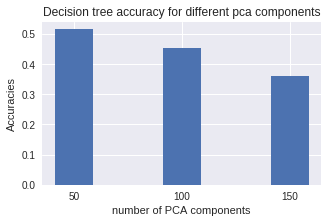

In [93]:
import seaborn
ind = np.arange(len(accuracies))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
ax.bar(ind + width//8, accuracies, width)
ax.set_ylabel('Accuracies')
ax.set_xlabel('number of PCA components')
ax.set_title('Decision tree accuracy for different pca components')
ax.set_xticks(ind)
ax.set_xticklabels(n_comps)
fig.set_size_inches(5,3)
plt.show()

**It appears that the lower the number of components we use the better the accuracy of the tree, this might be because there are less features to overfit to, making the classifier generalize in a better way.**

In [94]:
from sklearn.ensemble import RandomForestClassifier

def forest_pred(forest_szs, X_train, X_test):
    entropy_accs,gini_accs = [],[]
    for t in forest_szs:
        forest_gini = RandomForestClassifier(n_estimators=t, n_jobs=-1)
        forest_entropy = RandomForestClassifier(n_estimators=t, n_jobs=-1, criterion='entropy')

        forest_gini.fit(X_train,y_train)
        gini_pred = forest_gini.predict(X_test) 
        gini_acc = np.mean(gini_pred==y_test)
        gini_accs.append(gini_acc)
        print(f'{t}, gini => {gini_acc}')

        forest_entropy.fit(X_train,y_train)
        entropy_pred = forest_entropy.predict(X_test)
        entropy_acc = np.mean(entropy_pred == y_test)
        entropy_accs.append(entropy_acc)
        print(f'{t}, entropy => {entropy_acc}')
    return entropy_accs, gini_accs
        
tree_cnt = [10,30,100,300]
entropy_accs, gini_accs = forest_pred(tree_cnt, X_train, X_test)

10, gini => 0.76
10, entropy => 0.815
30, gini => 0.86
30, entropy => 0.92
100, gini => 0.95
100, entropy => 0.955
300, gini => 0.955
300, entropy => 0.975


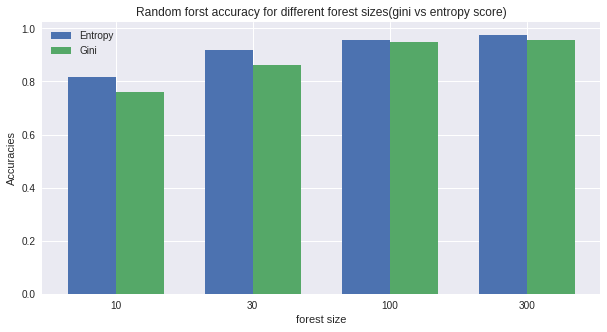

In [95]:
def plot_bar(arr1, arr2,label1,label2,title):
    ind = np.arange(len(arr1))  # the x locations for the groups
    width = 0.35  # the width of the bars
    fig, ax = plt.subplots()
    ax.bar(ind - width/2, arr1, width, label=label1)
    ax.bar(ind + width/2, arr2, width,label=label2)
    ax.set_ylabel('Accuracies')
    ax.set_xlabel('forest size')
    ax.set_title(title)
    ax.set_xticks(ind)
    ax.set_xticklabels(tree_cnt)
    plt.legend()
    fig.set_size_inches(10,5)
    plt.show()
    
plot_bar(entropy_accs,gini_accs,'Entropy','Gini','Random forst accuracy for different forest sizes(gini vs entropy score)')

In [96]:
pca_forest = PCA(n_components=100)
entropy_accs_pca, gini_accs_pca = forest_pred(tree_cnt, pca_forest.fit_transform(X_train),pca_forest.transform(X_test))

10, gini => 0.595
10, entropy => 0.635
30, gini => 0.84
30, entropy => 0.805
100, gini => 0.89
100, entropy => 0.91
300, gini => 0.93
300, entropy => 0.94


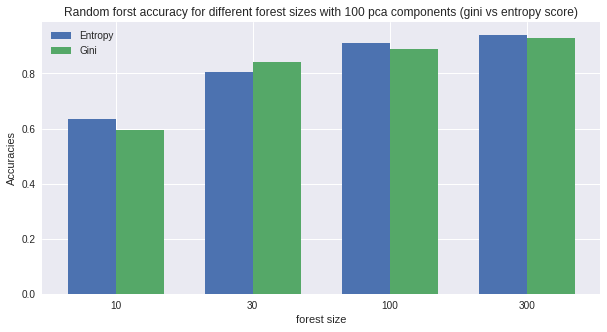

In [97]:
plot_bar(entropy_accs_pca,gini_accs_pca,'Entropy','Gini','Random forst accuracy for different forest sizes with 100 pca components (gini vs entropy score)')

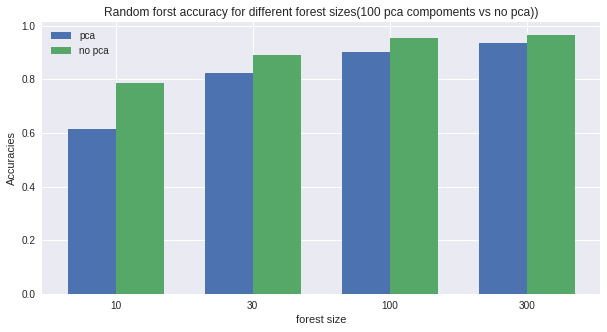

In [98]:
avg_no_pca = (np.array(entropy_accs) + np.array(gini_accs))/2
avg_pca = (np.array(entropy_accs_pca) + np.array(gini_accs_pca))/2

plot_bar(avg_pca,avg_no_pca,'pca','no pca','Random forst accuracy for different forest sizes(100 pca compoments vs no pca))')
